In [ ]:
%pip install tensorflow
%pip install seaborn
%pip install scikit-learn

In [166]:
import os

#base settings

baseDir = "./datasets/FruitDataset/"
os.listdir(baseDir)

batch_size = 4
image_size = 64

In [167]:
import tensorflow as tf

# Load training and validation datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    baseDir + "train",
    labels="inferred", #figure out the values
    label_mode="categorical",  # Use categorical for multi-class classification
    image_size=(image_size,image_size),
    batch_size=batch_size,
    shuffle=True,
    seed=42            
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    baseDir + "dev",
    labels="inferred",
    label_mode="categorical",
    image_size=(image_size,image_size),
    batch_size=batch_size,
    shuffle=True,
    seed=42
)

# Test dataset (assuming separate directory for test data)
test_ds = tf.keras.utils.image_dataset_from_directory(
    baseDir + "test",
    labels="inferred",
    label_mode="categorical",
    image_size=(image_size,image_size),
    batch_size=batch_size,
    shuffle=False  # No shuffling for test set
)

print(train_ds.class_names)

Found 383 files belonging to 3 classes.
Found 109 files belonging to 3 classes.
Found 58 files belonging to 3 classes.
['Apple', 'Banana', 'Orange']


In [169]:
# define model layers
from tensorflow.keras import layers
import tensorflow as tf

model = tf.keras.applications.MobileNetV2(
    input_shape=(64, 64, 3),
    alpha=1.0,
    include_top=False,
    weights='./weights/mobilenetvegetables.weights.h5',
    input_tensor=None,
    pooling=None,
    classes=15,
    classifier_activation='softmax'
)

# Ctrl + /, CMD + /
model = tf.keras.models.Sequential([
    model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [170]:
model.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_64             │ (None, 2, 2, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 5120)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 128)            │       655,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,913,859 (11.12 MB)

 Trainable params: 2,879,747 (10.99 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [171]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',  # Suitable for classification
                  metrics=['accuracy'])

In [172]:
epochs = 30
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 84ms/step - accuracy: 0.5688 - loss: 0.9323 - val_accuracy: 0.5872 - val_loss: 1.3693
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.7548 - loss: 0.6298 - val_accuracy: 0.4679 - val_loss: 2.1306
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.8616 - loss: 0.3716 - val_accuracy: 0.4862 - val_loss: 2.6921
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.8562 - loss: 0.3124 - val_accuracy: 0.6239 - val_loss: 1.4229
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - accuracy: 0.9405 - loss: 0.1681 - val_accuracy: 0.5138 - val_loss: 2.5951
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - accuracy: 0.9463 - loss: 0.1727 - val_accuracy: 0.5321 - val_loss: 2.3600
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.9779 - loss: 0.0769 - val_accuracy: 0.5963 - val_loss: 2.2674
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.9793 - loss: 0.0885 - val_accuracy: 0.6

In [173]:
model.save("./models/mobilenetv2Model.keras")

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8879 - loss: 0.4373


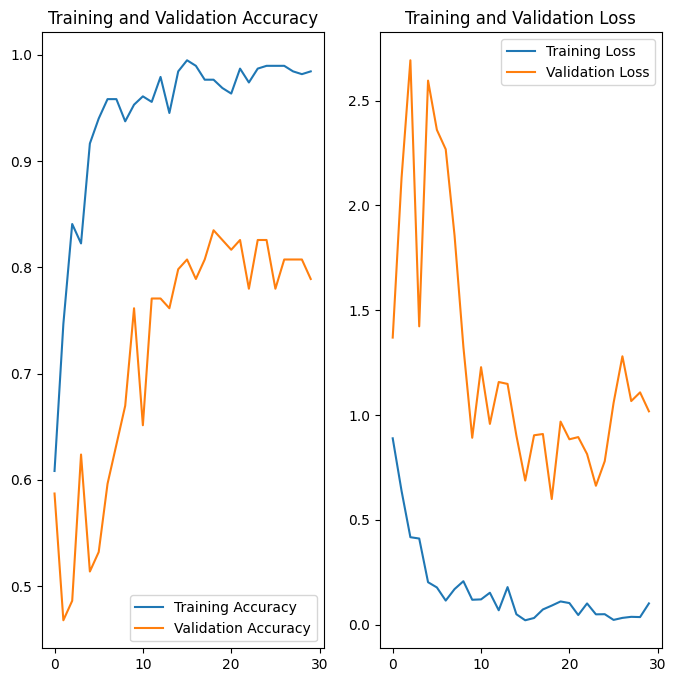

In [174]:
import matplotlib.pyplot as plt

model.evaluate(test_ds)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

2025-07-12 12:50:34.809191: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step
Precision: 0.854
Recall (Sensitivity): 0.844
F1 Score: 0.844


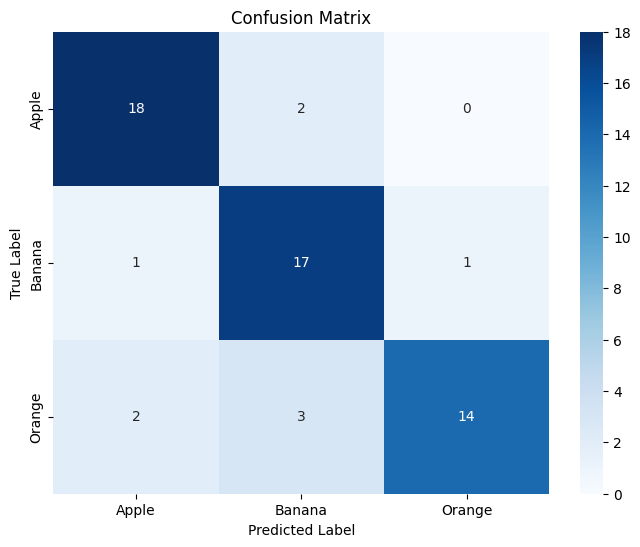

In [175]:
# Get predictions and true labels
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

y_true = []

for images, labels in test_ds:
    y_true.extend(np.argmax(labels.numpy(), axis=1))
y_true = np.array(y_true)

y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate precision, recall, f1-score (macro average)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
print(f"Precision: {precision:.3f}")
print(f"Recall (Sensitivity): {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

# Plot confusion matrix
class_names = train_ds.class_names
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [179]:
#prediction

import tensorflow as tf
import numpy as np

# === Settings ===
model_path = "./models/mobilenetv2Model.keras"            # Replace with your model path
image_path = "./images/test/orange_30.jpg"        # Replace with your image path
class_names = ["Apple", "Banana", "Orange"]  # Your class labels

model = tf.keras.models.load_model(model_path)

# === Load & Preprocess Image ===
img = tf.keras.utils.load_img(image_path, target_size=(image_size,image_size))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0)      # Add batch dimension

# === Predict ===
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
confidence = np.max(predictions[0])

# === Output ===
print(f"Predicted: {class_names[predicted_class]} ({confidence:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted: Orange (0.79)
